# A Steganography Algorithm for Hiding Secret Message inside Image using Random Key

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import random
from IPython.display import Image
import os


#Converting message to binary format

def message2binary(message):
    if type(message) == str:
        result= ''.join([ format(ord(i), "08b") for i in message ])

    elif type(message) == bytes or type(message) == np.ndarray:
        result= [ format(i, "08b") for i in message ]

    elif type(message) == int or type(message) == np.uint8:
        result=format(message, "08b")

    else:
        raise TypeError("Input type is not supported")

    return result 

#XOR of two characters
def xor(a,b):
    s=""
    if a==b:
        s+='0'
    else:
        s+='1'
    return s

# Secret plain text XOR 8-bit Random key
def encrypt_data(msg,rand_key):
    res=""
    i=0
    n=len(msg)
    while(i<n):
        res+=xor(msg[i],rand_key[i%8])
        i+=1
    return res

#Binary to text
def BinaryToDecimal(binary):
     
    # Using int function to convert to
    # string  
    string = int(binary, 2)
     
    return string

#ENCODER
data_len=0
def encoder(image):
    img=image.copy()
    rand_key=[str(random.randint(0,1)) for _ in range(8)] 
    rand_key=''.join(rand_key)
    
    msg=input("Enter the data to be Encoded:")
    if len(msg)==0:
        raise ValueError('Data is empty')
        
    
    # Secret message to encrypted message
    msg_binary=message2binary(msg) #str
    #print('secret msg in binary: ',msg_binary)
    data=encrypt_data(msg_binary,rand_key) #str
    #print('data in binary',data)
    
    global data_len
    data_len=len(data)
    print("The Length of encrypted text : ",data_len)
    
    no_bytes=(img.shape[0] * img.shape[1] * 3)
    if(data_len>no_bytes):
        raise ValueError("Error encountered Insufficient bytes, Need Bigger Image or give Less Data !!")
        
    data_index = 0
    key_index=0
    
    img[0][0][0]=int(rand_key,2) # hiding random key in 1st pixel of cover image
    
    for i in range(img.shape[0]):
        for pixel in range(img.shape[1]):
            if i==0 and pixel==0:
                continue
            r, g, b = message2binary(img[i][pixel])
            
            if data_index < data_len:
              # hiding the data into LSB(Least Significant Bit) of Red Pixel
                if xor(r[-2],rand_key[(key_index%8)])=='1': #checking with 2nd LSB bit
                    img[i][pixel][0] = int(r[:-1]+data[data_index], 2)
                    data_index += 1
                    key_index+=1
            

            if data_index < data_len:
             # hiding the data into LSB of Green Pixel
                if xor(g[-2],rand_key[(key_index%8)])=='1':
                    img[i][pixel][1] = int(g[:-1]+data[data_index], 2)
                    data_index += 1
                    key_index+=1

            if data_index < data_len:
              # hiding the data into LSB of  Blue Pixel
                if xor(b[-2],rand_key[(key_index%8)])=='1':
                    img[i][pixel][2] = int(b[:-1]+data[data_index], 2) #changing 2nd LSB 
                    data_index += 1
                    key_index+=1

              # if data is encoded, just breaking out of the Loop
            if data_index >= data_len:
                break
    cv2.imwrite("stegano.png",img)
    print("Encoded the data successfully and the image is successfully saved as stegano.png")
    
    
#DECODER
    
def decoder(img):
    rand_key=format(img[0][0][0],'08b')
    secret_msg=""
    data_index=0
    key_index=0
    for i in range(img.shape[0]):
        for pixel in range(img.shape[1]):
            if i==0 and pixel==0:
                continue
            r, g, b = message2binary(img[i][pixel])
            
            if data_index < data_len:
              # hiding the data into LSB(Least Significant Bit) of Red Pixel
                if xor(r[-2],rand_key[(key_index%8)])=='1':
                    secret_msg+=r[-1]
                    data_index += 1
                    key_index+=1
            

            if data_index < data_len:
             # hiding the data into LSB of Green Pixel
                if xor(g[-2],rand_key[(key_index%8)])=='1':
                    secret_msg+=g[-1]
                    data_index += 1
                    key_index+=1

            if data_index < data_len:
              # hiding the data into LSB of  Blue Pixel
                if xor(b[-2],rand_key[(key_index%8)])=='1':
                    secret_msg+=b[-1]
                    data_index += 1
                    key_index+=1

              # if data is encoded, just breaking out of the Loop
            if data_index >= data_len:
                break
                
    #encrypt data into secret message in binary
    k=0
    decoded_binary=''
    for i in secret_msg:
        decoded_binary+=xor(i,rand_key[k%8])
        k+=1
        
    #secret message in binary to text
    decoded_msg=''
    for i in range(0, len(decoded_binary), 8):

        temp_data = decoded_binary[i:i + 8]
        decimal_data = BinaryToDecimal(temp_data)
        decoded_msg+=chr(decimal_data)
    
    print("Encoded secret message is: ",decoded_msg)
    
    
    
if __name__ == "__main__":
    image=cv2.imread("baboon-1.jpeg")
    cv2.imshow('Cover Image',image)
    encoder(image)
    encoded_img=cv2.imread('stegano.png')
    cv2.imshow('Stegano Image',encoded_img)
    decoder(encoded_img)

Enter the data to be Encoded:"Stegnography" means "hiding writing".
The Length of encrypted text :  304
Encoded the data successfully and the image is successfully saved as stegano.png
Encoded secret message is:  "Stegnography" means "hiding writing".


# Original Image

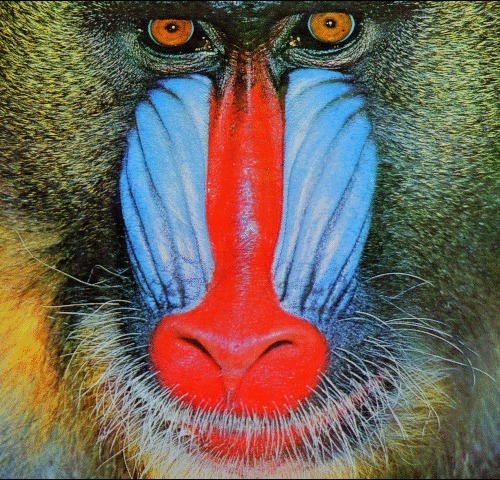

In [5]:
Image('baboon-1.jpeg')

# The Image after Encoding Data

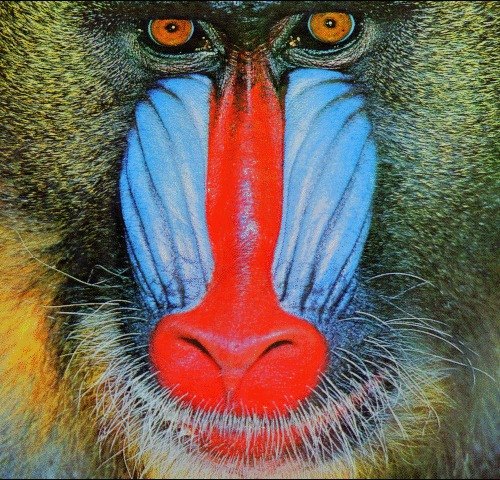

In [6]:
Image('stegano.png')